In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sympy import symbols, diff, solve


def quadratic_interpolation(x_data,y_data,x_new,plot=False):
  """
    Perform quadratic interpolation on a set of data points and optionally plot the interpolated curve.

    Parameters:
    - x_data (array-like): x-coordinates of the input data points.
    - y_data (array-like): y-coordinates of the input data points.
    - x_new (float): x-coordinate for which the interpolation is desired.
    - plot (bool, optional): If True, the function will plot the interpolated curve along with the input data points.

    Returns:
    - solution (dict): Coefficients of the quadratic interpolating polynomials.
    - yn (float): Interpolated y-value corresponding to x_new.

    The function uses symbolic computation to derive a system of equations based on the quadratic polynomial form.
    It then solves the system of equations to obtain the coefficients for each quadratic segment.

    If 'plot' is set to True, the function will display a plot of the interpolated curve along with the input data points.
    The interpolated y-value at x_new is also marked on the plot.

    Example:
    ```python
    x_data = [1, 2, 3, 4]
    y_data = [2, 3, 5, 10]
    x_new = 2.5
    solution, yn = quadratic_interpolation(x_data, y_data, x_new, plot=True)
    ```

    Note: This function assumes that the input data points are provided in ascending order of x-coordinates.

  """
  data = [[i,j] for i,j in zip(x_data,y_data)]
  points = np.array(data)
  n = len(points) - 1

  x, y = symbols('x, y')     #sympy
  a = symbols('a1:%d'%(n+1))
  b = symbols('b1:%d'%(n+1))
  c = symbols('c1:%d'%(n+1))


## list of quadratic functions 
  f = [a[i]*x**2 + b[i]*x + c[i] - y for i in range(n)]


  equations = []
  equations.append(f[0].subs(x, points[0, 0]).subs(y, points[0, 1]))

# Generates quadratic equations at different points
  for i in range(n - 1):
    equations.append(f[i].subs(x, points[i + 1, 0]).subs(y, points[i + 1, 1]))
    equations.append(f[i + 1].subs(x, points[i + 1, 0]).subs(y, points[i + 1, 1]))

  equations.append(f[-1].subs(x, points[-1, 0]).subs(y, points[-1, 1]))


# First derivatives of the equations
  fdx = [diff(fi, x) for fi in f]
  for i in range(n - 1):
    equations.append(fdx[i].subs(x, points[i + 1, 0]) - fdx[i + 1].subs(x, points[i + 1, 0]))


  equations.append(a[-1])
  print(equations)

  equation_tuple = tuple(equations)
  coef_tuple = tuple(a+b+c)

  solution = solve(equation_tuple, coef_tuple)
  print(solution)

  if plot:
    for i in range(n):
        span = np.linspace(points[i, 0], points[i + 1, 0], 100)
        fi = f[i].subs(solution)
        print(f'Spline: {i+1}:  {fi}')
        plt.plot(span, [solve(fi.subs(x, i)) for i in span], label='f{i}'.format(i=i+1))
    plt.scatter(points[:, 0], points[:, 1])


  for i in range(n):
    if x_new >= points[i,0] and x_new <= points[i+1,0]:
      fi=  f[i].subs(solution)
      yn = solve(fi.subs(x,x_new))
      plt.scatter(x_new, yn,label='f{i}(x_new)'.format(i=i +1))
      break;
    else:
      yn = 0

  if(yn ==0):
    print("The value is out of bound")

  plt.grid()
  plt.legend()
  plt.show()
  return solution,yn

[c1, 100.0*a1 + 10.0*b1 + c1 - 227.04, 100.0*a2 + 10.0*b2 + c2 - 227.04, 225.0*a2 + 15.0*b2 + c2 - 362.78, 225.0*a3 + 15.0*b3 + c3 - 362.78, 400.0*a3 + 20.0*b3 + c3 - 517.35, 400.0*a4 + 20.0*b4 + c4 - 517.35, 506.25*a4 + 22.5*b4 + c4 - 602.97, 506.25*a5 + 22.5*b5 + c5 - 602.97, 900.0*a5 + 30.0*b5 + c5 - 901.67, 20.0*a1 - 20.0*a2 + b1 - b2, 30.0*a2 - 30.0*a3 + b2 - b3, 40.0*a3 - 40.0*a4 + b3 - b4, 45.0*a4 - 45.0*a5 + b4 - b5, a5]
{a1: -0.156666666666667, a2: 1.20213333333333, a3: -0.448933333333333, a4: 2.23146666666667, a5: 0.0, b1: 24.2706666666667, b2: -2.90533333333333, b3: 46.6266666666667, b4: -60.5893333333333, b5: 39.8266666666667, c1: 0.0, c2: 135.880000000000, c3: -235.610000000000, c4: 836.550000000000, c5: -293.130000000000}
Spline: 1:  -0.156666666666667*x**2 + 24.2706666666667*x - y
Spline: 2:  1.20213333333333*x**2 - 2.90533333333333*x - y + 135.88
Spline: 3:  -0.448933333333333*x**2 + 46.6266666666667*x - y - 235.61
Spline: 4:  2.23146666666667*x**2 - 60.5893333333333*x 

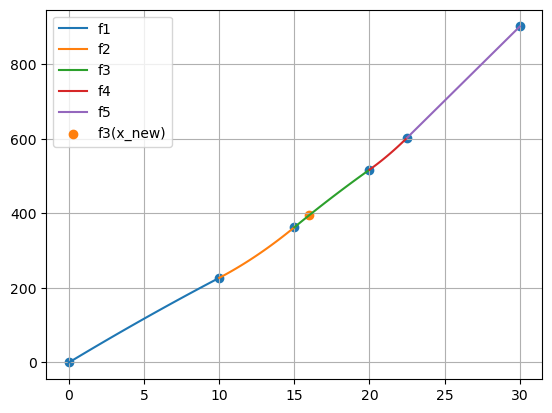

[395.489733333333]


In [24]:
x = [0,0.5,1,1.5,2]
y = [0.1,0.2,1,0.5,1]
x_data = [0,10,15,20,22.5,30]
y_data = [0,227.04,362.78,517.35,602.97,901.67]

solution,y = quadratic_interpolation(x_data,y_data,x_new=16,plot=True)
print(y)